In [2]:
import os
import pandas as pd
#os.chdir("")
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("AirPassengers.csv",index_col=0)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

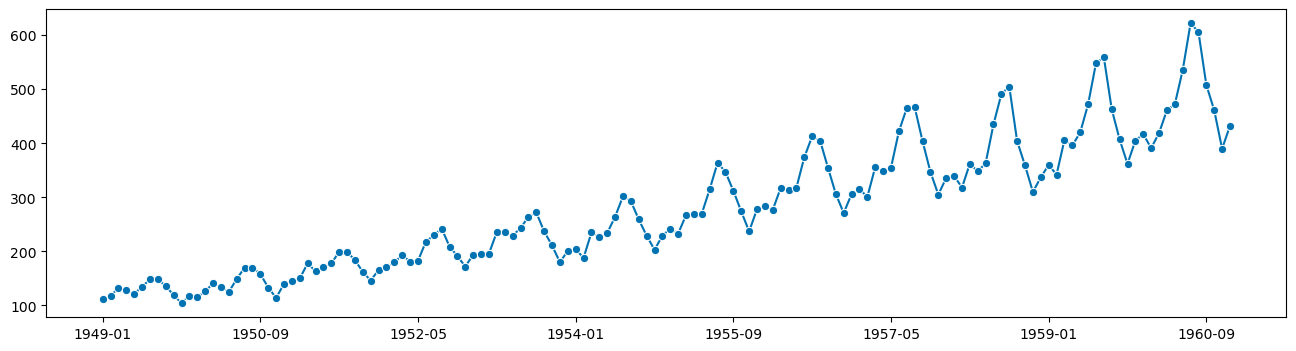

In [4]:
idx=pd.to_datetime(df.index).to_period("M")
df.index = idx
plot_series(df)

In [5]:
y=df["Passengers"]
y_train,y_test =temporal_train_test_split(y,test_size=12)
print(y_train.shape,y_test.shape)

(132,) (12,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

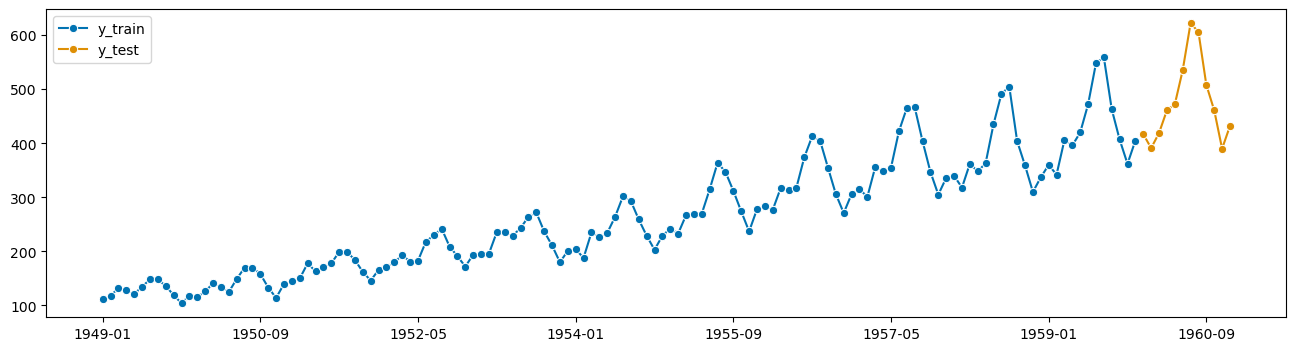

In [6]:
plot_series(y_train,y_test,labels=["y_train","y_test"])

Specifying a forecasting horizon

In [7]:
fh=ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

# Exponential Smoothing

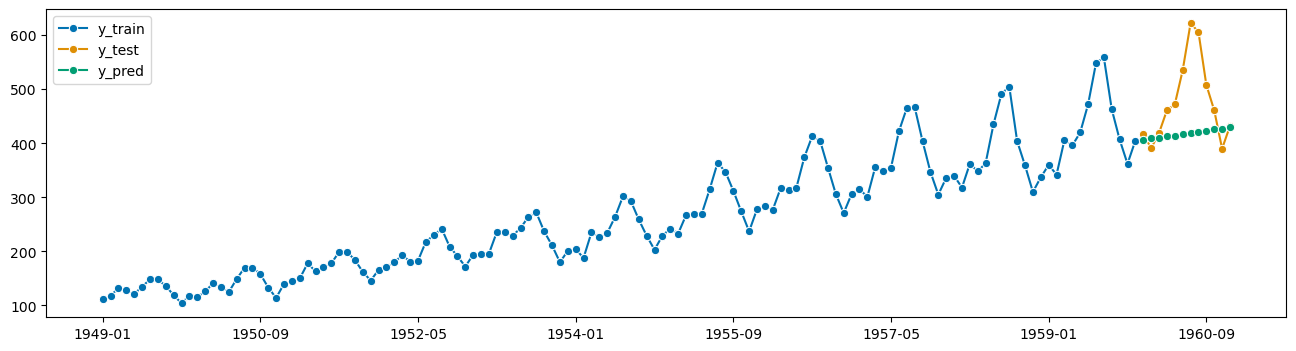

In [8]:
forecaster=ExponentialSmoothing(trend="add",seasonal="additive",sp=2)
forecaster.fit(y_train)
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=["y_train","y_test","y_pred"])
plt.show()

In [9]:
mean_squared_error(y_test,y_pred,square_root=True)

93.72632825844109

# AUTO ETS

In [10]:
forecaster=AutoETS(auto=True,sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(MAM)   Log Likelihood                -469.389
Date:                Thu, 16 Nov 2023   AIC                            974.777
Time:                        18:48:16   BIC                           1026.668
Sample:                    01-31-1949   HQIC                           995.863
                         - 12-31-1959   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.083     12.008      0.000       0.837       1.163
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan
smoothing_season

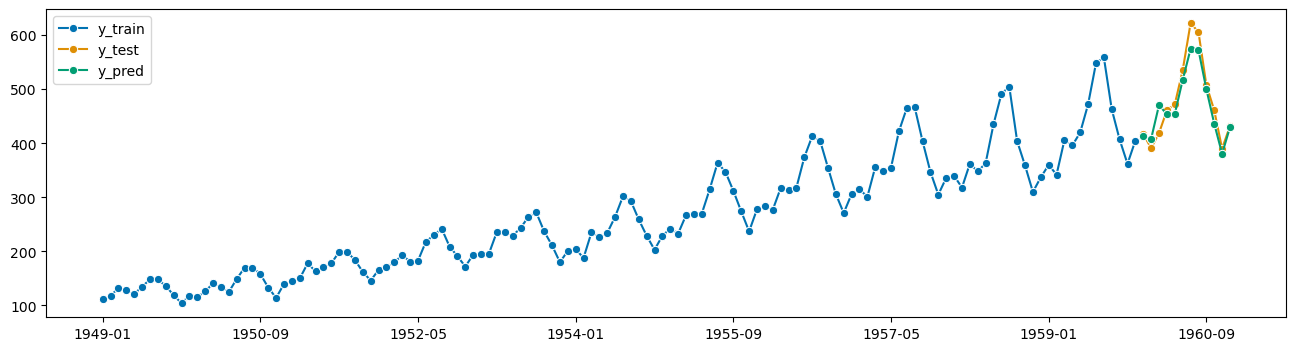

In [11]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=["y_train","y_test","y_pred"])
plt.show()

In [12]:
mean_squared_error(y_test,y_pred,square_root=True)

25.523492797254274